# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# import libraries here
import pandas as pd
import numpy as np


# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [2]:
# your answer here
employee = pd.read_csv('Employee.csv')

In [5]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
# your answer here-1st way
employee.groupby(['Department']).agg({'Salary':'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [4]:
# your answer here-2nd way
employee.pivot_table(index='Department', values='Salary')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [5]:
# your answer here
employee.pivot_table(index=['Department','Title'], values='Salary').reset_index()

,Department,Title,Salary
0,HR,VP,70.0
1,HR,analyst,32.5
2,IT,VP,70.0
3,IT,analyst,32.5
4,IT,associate,60.0
5,Sales,associate,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
# your answer here
employee.pivot_table(index=['Department','Title'], values=['Years','Salary']).reset_index()

,Department,Title,Salary,Years
0,HR,VP,70.0,8.0
1,HR,analyst,32.5,3.0
2,IT,VP,70.0,8.0
3,IT,analyst,32.5,1.5
4,IT,associate,60.0,7.0
5,Sales,associate,55.0,2.5


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [7]:
employee['Employees'] = 1

In [8]:
# your answer here
employee.pivot_table(index=['Department','Title'], values=['Employees','Salary'], aggfunc={'Employees':np.sum, 'Salary':np.mean}).reset_index()

,Department,Title,Employees,Salary
0,HR,VP,1,70.0
1,HR,analyst,2,32.5
2,IT,VP,1,70.0
3,IT,analyst,2,32.5
4,IT,associate,1,60.0
5,Sales,associate,2,55.0


#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [9]:
# your answer here
employee.pivot_table(index=['Department','Title'], values=['Salary'], aggfunc={'Salary':[min, max, np.mean, np.std]}).reset_index()

Department      Title Salary                      
                           max  mean   min       std
0         HR         VP   70.0  70.0  70.0       NaN
1         HR    analyst   35.0  32.5  30.0  3.535534
2         IT         VP   70.0  70.0  70.0       NaN
3         IT    analyst   35.0  32.5  30.0  3.535534
4         IT  associate   60.0  60.0  60.0       NaN
5      Sales  associate   55.0  55.0  55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [10]:
# your answer here
employee.pivot_table(index=['Department','Title'], values=['Salary'], aggfunc={'Salary':[min, max, np.mean, np.std]}, fill_value=0).reset_index()

Department      Title Salary                    
                           max  mean min       std
0         HR         VP     70  70.0  70  0.000000
1         HR    analyst     35  32.5  30  3.535534
2         IT         VP     70  70.0  70  0.000000
3         IT    analyst     35  32.5  30  3.535534
4         IT  associate     60  60.0  60  0.000000
5      Sales  associate     55  55.0  55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [11]:
# your answer here
employee.pivot_table(index=['Department'], values=['Employees','Salary'], aggfunc={'Employees':np.sum, 'Salary':np.sum}).reset_index()

,Department,Employees,Salary
0,HR,3,135
1,IT,4,195
2,Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [12]:
# your answer here
employee.pivot_table(index=['Department','Title'], values=['Years','Salary'], aggfunc={'Years':np.sum, 'Salary':np.mean}).reset_index()

,Department,Title,Salary,Years
0,HR,VP,70.0,8
1,HR,analyst,32.5,6
2,IT,VP,70.0,8
3,IT,analyst,32.5,3
4,IT,associate,60.0,7
5,Sales,associate,55.0,5


#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [12]:
# your answer here--Your custom function here
        

In [13]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# your answer here
fitbit = pd.read_csv('Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [3]:
# your answer here
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [4]:
# your answer here
fitbit.head(5)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [5]:
# your answer here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])


0.5714518481062606

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

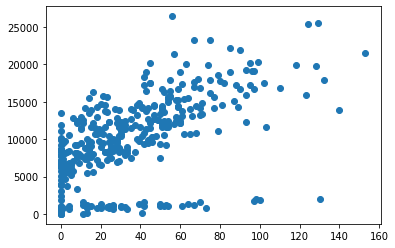

In [6]:
# your answer here
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [7]:
# your comment here
# Exist a positive relation between columns
# that means than while have more minutes active there are more steps

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [23]:
# your answer here
fitbit['Minutes Sedentary'].corr(fitbit['Steps'])

0.07690608062990097

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

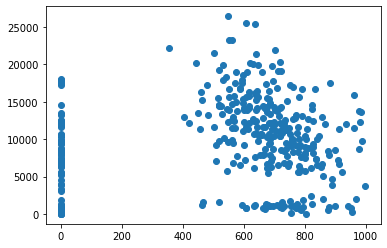

In [24]:
# your answer here
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'])

In [22]:
# Your comment here
# exists a negative relation
# that means than when have more sedendatry minutes lest steps.

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [25]:
# your answer here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.13098565950836388

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

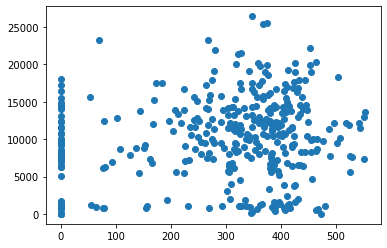

In [26]:
# your answer here
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'])

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [8]:
# your answer here
fb = fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']]
fb

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


In [10]:
#Print cor_fit
fb.corr()


,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [11]:
# your answer here
# Minutes Very Actvie

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [12]:
# your answer here
time_grades = pd.read_csv('Time_Grades.csv')

In [14]:
#Print time_grades
time_grades.head()

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9


#### Show visually the frequency distribution of the time_grades dataset.

In [17]:
# your answer here
time_grades.value_counts()

Name      Study time  Grade
Alicia    11          7        1
Ana       18          9        1
Carlos    12          7        1
Cristina  13          8        1
David     8           9        1
Eva       5           3        1
Gemma     7           8        1
Gervasio  7           3        1
Jonathan  2           1        1
Jose      4           4        1
Maria     9           7        1
Pedro     6           5        1
Pilar     3           2        1
Samuel    20          9        1
Sonia     10          7        1
dtype: int64

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [18]:
# your answer here-Pearson 
time_grades['Study time'].corr(time_grades['Grade'])

0.7980456073578858

In [32]:
## your answer here-Spearman
# Yes exisist a positive relation

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

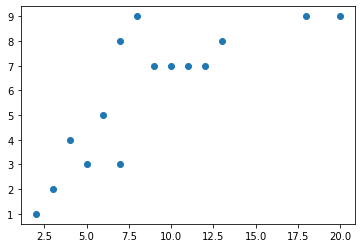

In [20]:
# your answer here
plt.scatter(time_grades['Study time'], time_grades['Grade'])

In [34]:
#your comment here
# Yes exisist a positive relation
# that means that while more sutudy time get more grades.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here